Step 0


C:\Users\sanch\AppData\Local\Temp\ipykernel_23316\916167023.py:49: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(field[x1:x2, y1:y2], cmap='binary')
C:\Users\sanch\AppData\Local\Temp\ipykernel_23316\916167023.py:49: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(field[x1:x2, y1:y2], cmap='binary')


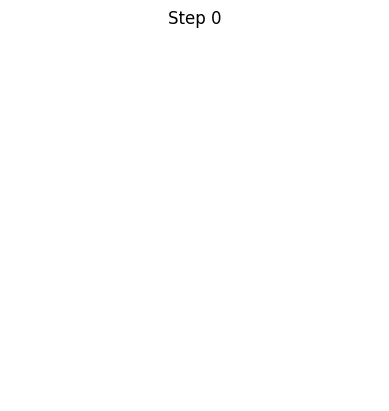

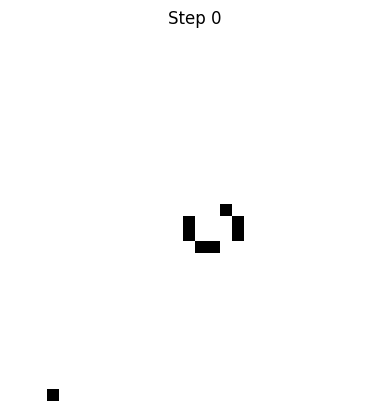

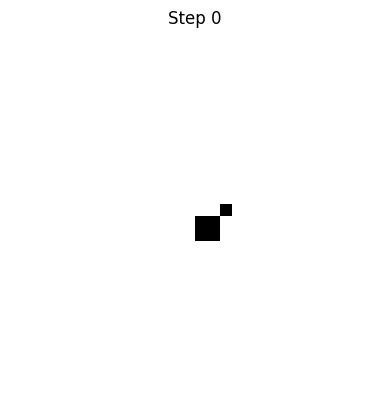

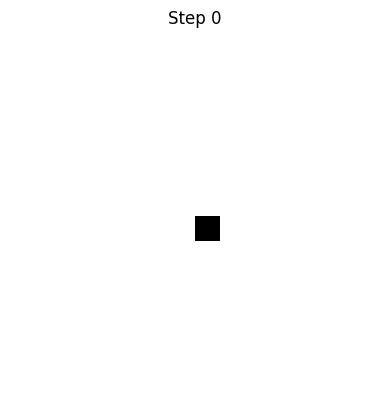

Step 5


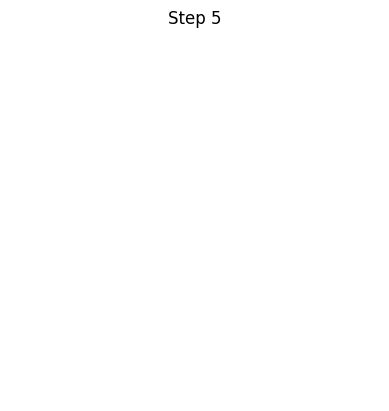

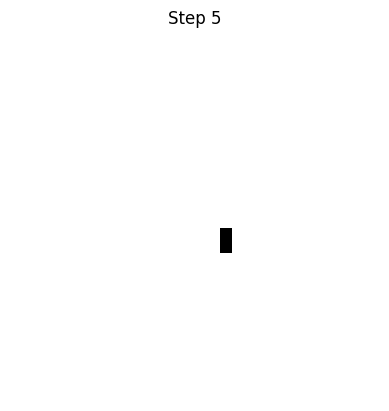

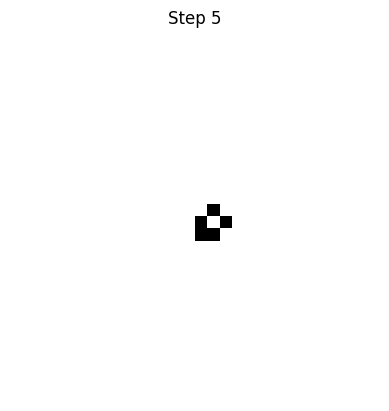

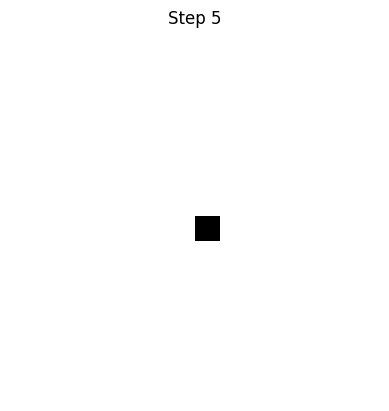

Step 10


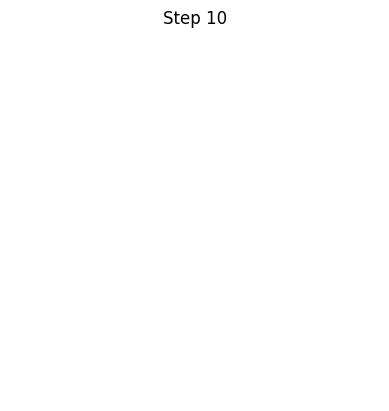

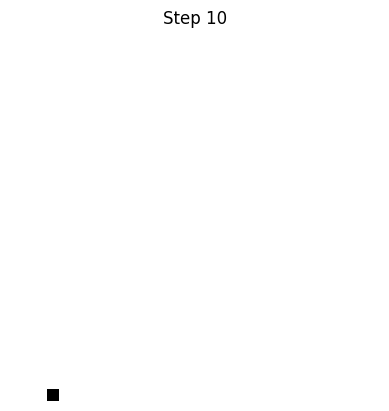

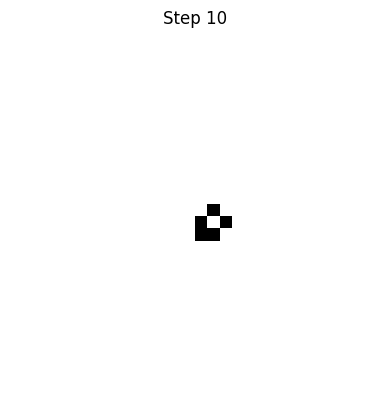

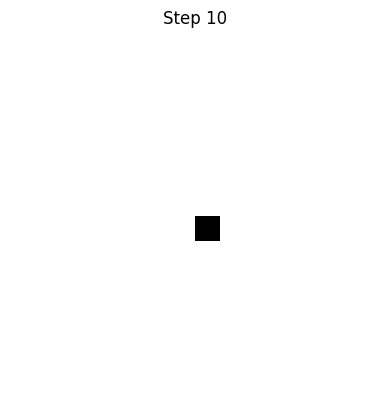

Step 15


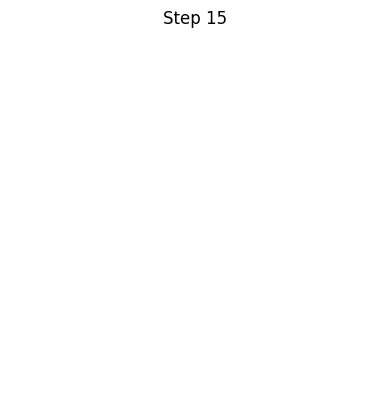

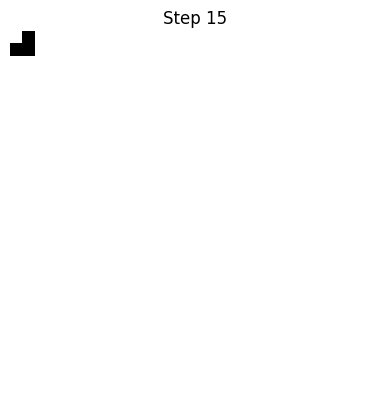

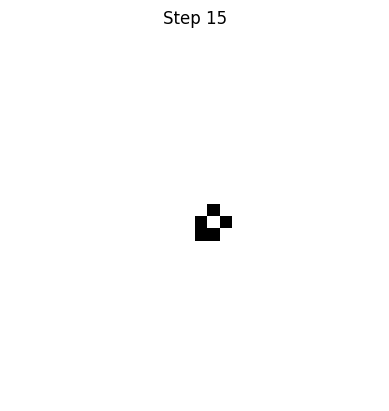

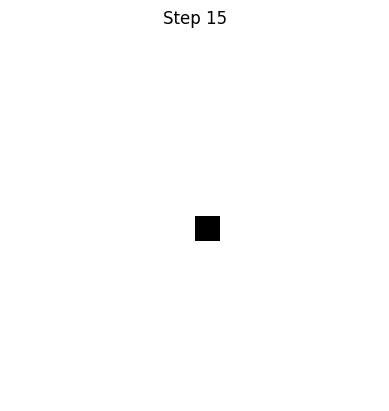

Step 20


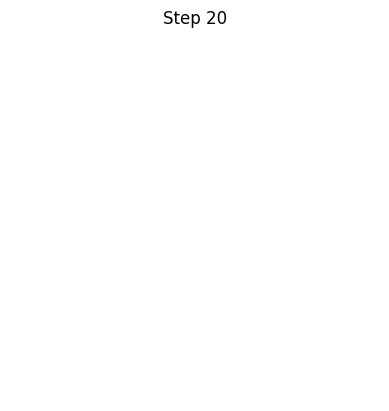

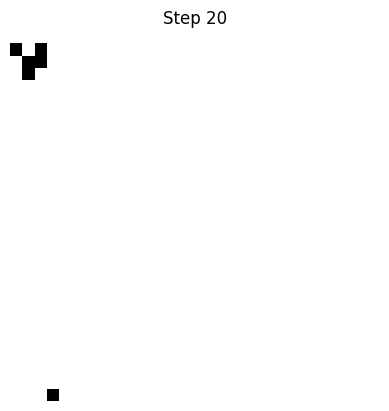

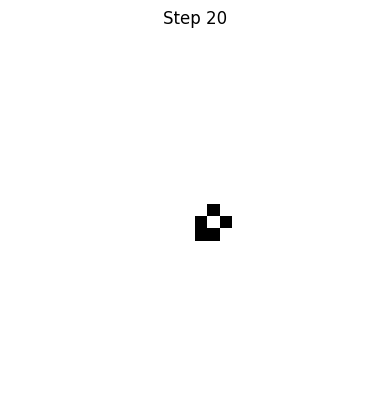

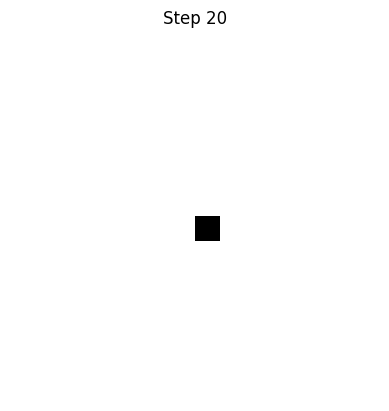

Step 25


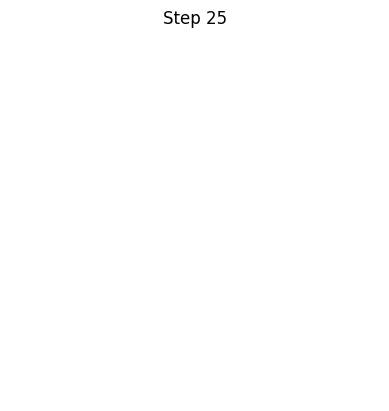

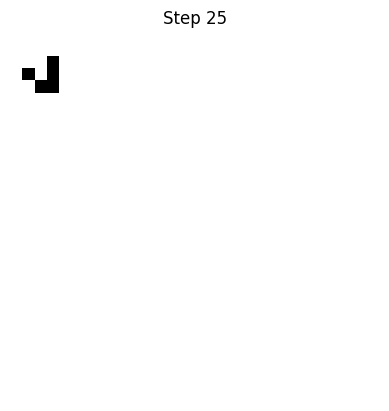

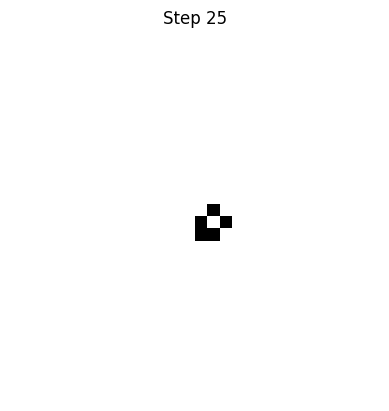

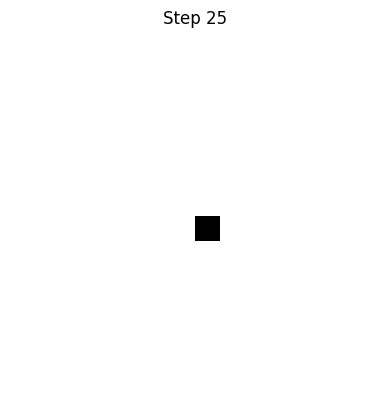

Step 30


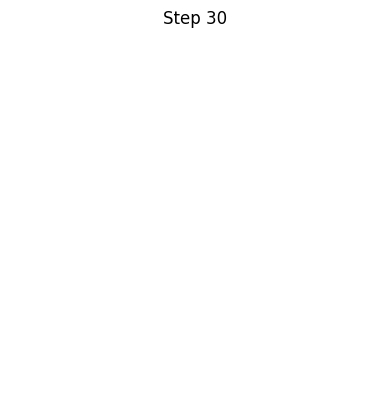

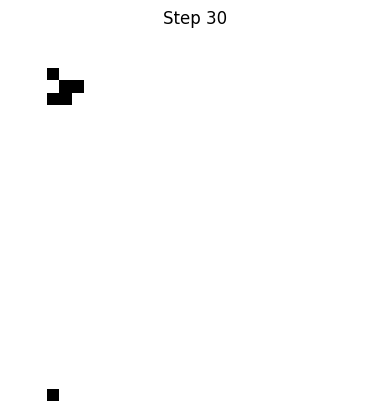

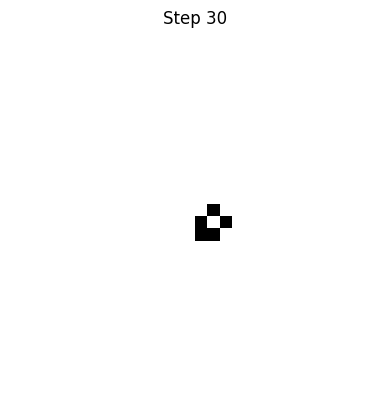

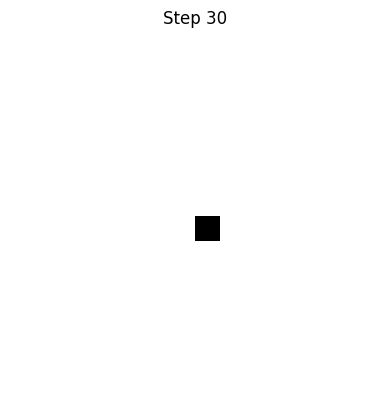

Step 35


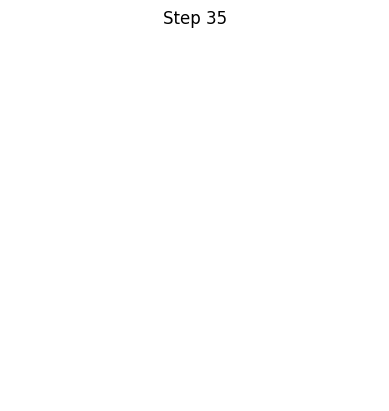

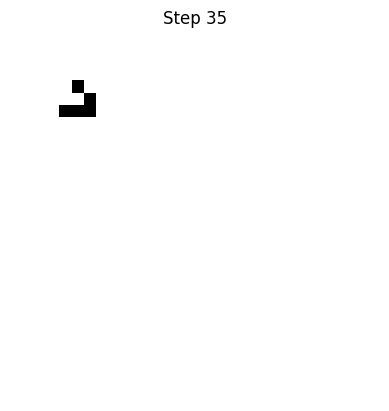

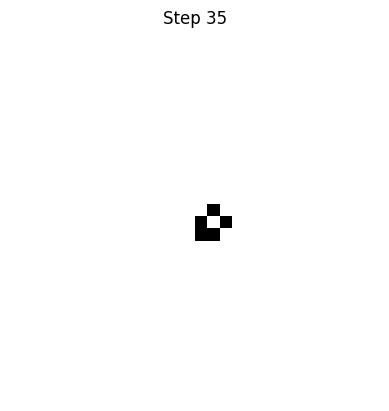

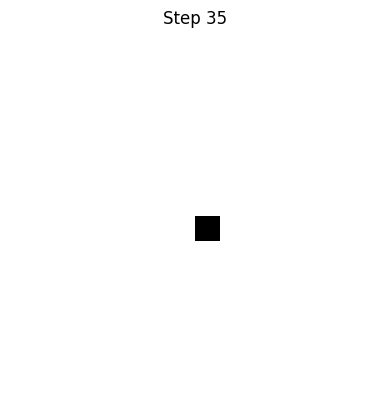

Step 40


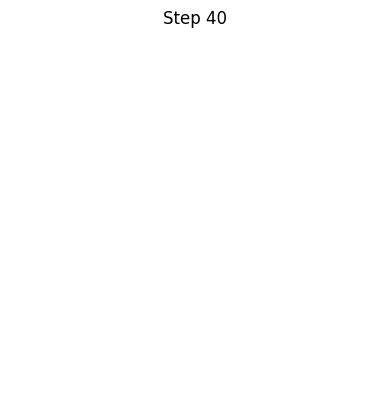

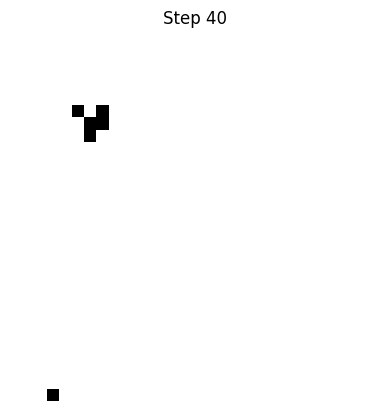

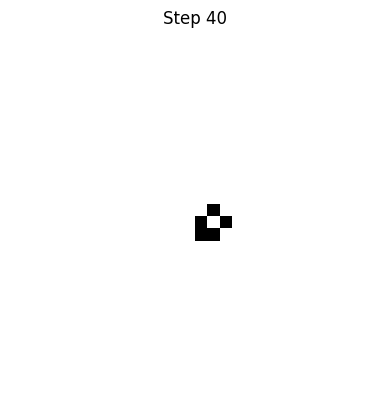

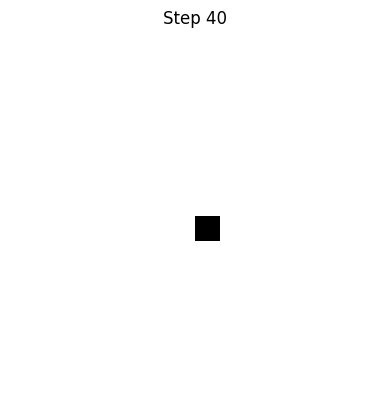

Step 45


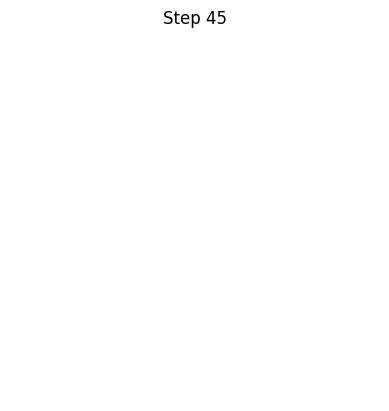

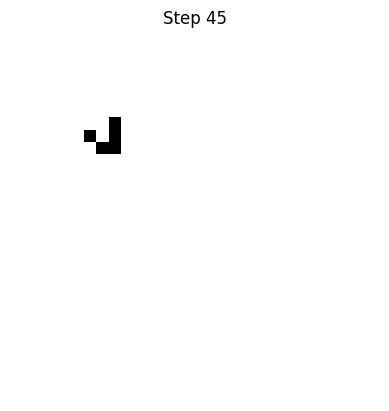

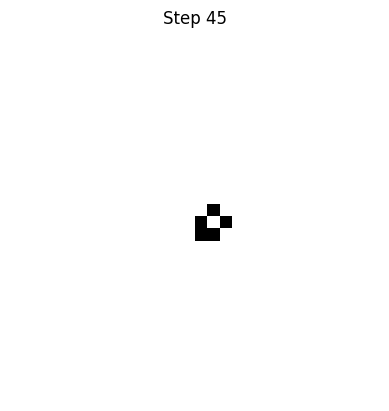

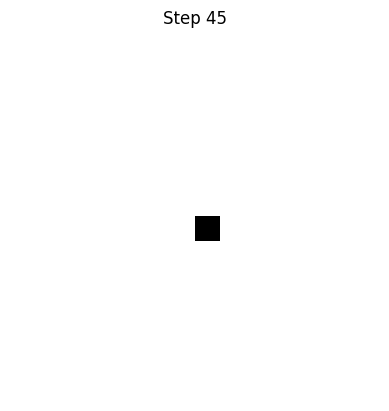

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Common Game of Life patterns

glider = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 1]
])

blinker = np.array([
    [1, 1, 1]
])

toad = np.array([
    [0, 1, 1, 1],
    [1, 1, 1, 0]
])

block = np.array([
    [1, 1],
    [1, 1]
])

def insert_seed(field, seed, x, y):
    sx, sy = seed.shape
    field[x:x+sx, y:y+sy] = seed

def evolve(field):
    size = field.shape[0]
    next_field = np.zeros_like(field)

    for i in range(1, size - 1):
        for j in range(1, size - 1):
            neighbors = np.sum(field[i-1:i+2, j-1:j+2]) - field[i, j]
            if field[i, j] == 1:
                next_field[i, j] = 1 if neighbors in [2, 3] else 0
            else:
                next_field[i, j] = 1 if neighbors == 3 else 0

    return next_field

def plot_local_field(field, center_x, center_y, window=20, step=None):
    x1, x2 = center_x - window, center_x + window
    y1, y2 = center_y - window, center_y + window

    plt.imshow(field[x1:x2, y1:y2], cmap='binary')
    if step is not None:
        plt.title(f"Step {step}")
    plt.axis('off')
    plt.show()

size = 100
field = (np.random.rand(size, size) < 0.02).astype(int)  # Sparse randomness

# Injecting multiple known patterns
insert_seed(field, glider, 10, 10)
insert_seed(field, toad, 30, 30)
insert_seed(field, blinker, 50, 50)
insert_seed(field, block, 70, 70)

size = 100
field = (np.random.rand(size, size) < 0.02).astype(int)  # Sparse randomness

# Injecting multiple known patterns
insert_seed(field, glider, 10, 10)
insert_seed(field, toad, 30, 30)
insert_seed(field, blinker, 50, 50)
insert_seed(field, block, 70, 70)

steps = 50
for step in range(steps):
    field = evolve(field)

    if step % 5 == 0:  # Plot every 5 steps
        print(f"Step {step}")
        plot_local_field(field, 10, 10, window=15, step=step)
        plot_local_field(field, 30, 30, window=15, step=step)
        plot_local_field(field, 50, 50, window=15, step=step)
        plot_local_field(field, 70, 70, window=15, step=step)



In [2]:
from matplotlib import animation
from IPython.display import HTML

def simulate_live(field, steps=100, interval=200, zoom_center=None, window=20):
    fig, ax = plt.subplots()

    if zoom_center:
        cx, cy = zoom_center
        def get_zoomed_frame(data):
            return data[cx-window:cx+window, cy-window:cy+window]
    else:
        get_zoomed_frame = lambda data: data

    img = ax.imshow(get_zoomed_frame(field), cmap='binary', interpolation='nearest')
    ax.axis('off')

    def update(step):
        nonlocal field
        field = evolve(field)
        img.set_data(get_zoomed_frame(field))
        return [img]

    ani = animation.FuncAnimation(fig, update, frames=steps, interval=interval, blit=True)
    plt.close()
    return HTML(ani.to_jshtml())

simulate_live(field.copy(), steps=100, interval=150, zoom_center=(30, 30), window=20)

In [3]:
simulate_live(field.copy(), steps=100, interval=100)